### Imports

In [5]:
import pandas as pd
import numpy as np

from pyhhmm.gaussian import GaussianHMM
from pandas_datareader.data import DataReader

import matplotlib.pyplot as plt
import yfinance as yf

 ### Data management 

In [7]:
# data extraction 
start_date="2017-01-01"
end_date="2022-06-01"
symbol="SPY"


data = yf.download(symbol, start=start_date, end=end_date)
data = data[["Open", "High", "Low", "Adj Close", "Volume"]]

[*********************100%%**********************]  1 of 1 completed


In [9]:
# Add returns and Range
df = data.copy()
df["Returns"] = (df["Adj Close"] / df["Adj Close"].shift(1)) - 1 
df["Range"] = (df["High"] / df["Low"]) - 1
df.dropna(inplace=True)
df.head()

,Open,High,Low,Adj Close,Volume,Returns,Range
Date,,,,,,,
2017-01-04,225.619995,226.750000,225.610001,202.535187,78744400,0.005949,0.005053
2017-01-05,226.270004,226.580002,225.479996,202.374252,78379000,-0.000795,0.004879
2017-01-06,226.529999,227.750000,225.899994,203.098343,71559900,0.003578,0.008189
2017-01-09,226.910004,227.070007,226.419998,202.427902,46939700,-0.003301,0.002871
2017-01-10,226.479996,227.449997,226.009995,202.427902,63771900,0.000000,0.006371


In [10]:
#Structure Data
X_train = df[["Returns", "Range"]]
X_train.head()

,Returns,Range
Date,,
2017-01-04,0.005949,0.005053
2017-01-05,-0.000795,0.004879
2017-01-06,0.003578,0.008189
2017-01-09,-0.003301,0.002871
2017-01-10,0.000000,0.006371


### HMM Learning

In [12]:
# Train Model 
model = GaussianHMM(n_states=4, covariance_type='full', n_emissions=2)
model.train([np.array(X_train.values)])

(<pyhhmm.gaussian.GaussianHMM at 0x176a0deb0>, 9742.728886203204)

In [14]:
# Check Results
hidden_states = model.predict([X_train.values])[0]
hidden_states[:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [16]:
 # Regime state means for each feature
model.means

array([[ 0.00191863,  0.00738805],
       [-0.00557412,  0.02100957],
       [ 0.01125021,  0.02193957],
       [-0.00707503,  0.05433482]])

In [17]:
# Regime state covariances for each feature 
model.covars


array([[[ 4.14535077e-05,  1.28588069e-05],
        [ 1.28588069e-05,  2.21949427e-05]],

       [[ 2.71910089e-04, -9.88859101e-06],
        [-9.88859101e-06,  1.06557298e-04]],

       [[ 3.97024111e-04,  2.88156317e-04],
        [ 2.88156317e-04,  3.15689025e-04]],

       [[ 3.28758113e-03,  3.96938888e-04],
        [ 3.96938888e-04,  7.73447081e-04]]])

### data visualization 

In [24]:
# Structure the prices for plotting 
i = 0
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []

prices = df["Adj Close"].values.astype(float)
print("Correct number of rows: ", len(prices) == len(hidden_states))
for s in hidden_states: 
    if s == 0: 
        labels_0.append(prices[i])
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
        
    if s == 1: 
        labels_0.append(float('nan'))
        labels_1.append(prices[i])
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
        
    if s == 2: 
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(prices[i])
        labels_3.append(float('nan'))
        
    if s == 3: 
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(prices[i])
        
    i+=1
    


Correct number of rows:  True


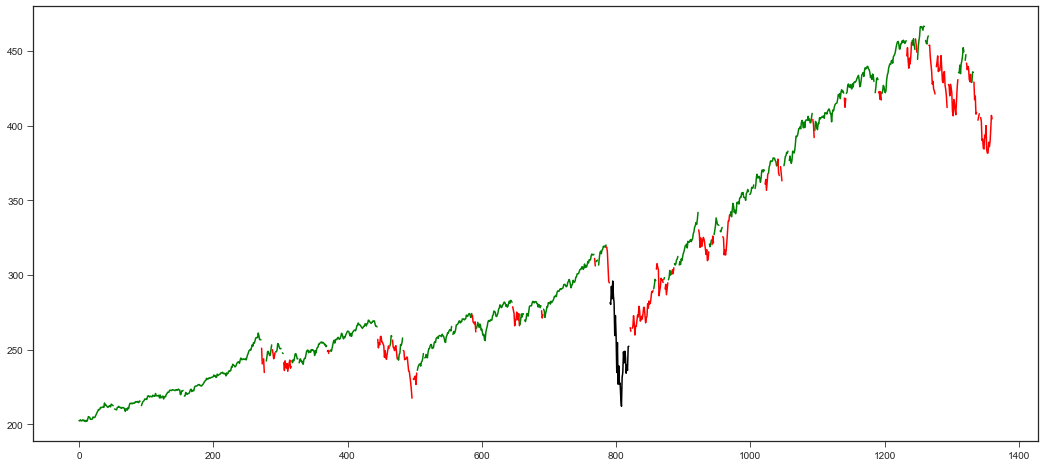

In [34]:
# plot chart 
fig = plt.figure(figsize= (18, 8))
plt.plot(labels_0, color= "green")
plt.plot(labels_1, color= "red")
plt.plot(labels_2, color= "orange")
plt.plot(labels_3, color= "black")
plt.show()